# Credit Card Fraud Detection

## Problem statement

#### The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.
#### In this project, we will analyse customer-level data which has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

#### The dataset is taken from the Kaggle Website website and it has a total of 2,84,807 transactions, out of which 492 are fraudulent. Since the dataset is highly imbalanced, so it needs to be handled before model building.


### Business Problem Overview

#### For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

#### It has been estimated by Nilson report that by 2020 the banking frauds would account to $30 billion worldwide.With the rise in digital payment channels, the number of fraudulent transactions is also increasing with new and different ways.

#### In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions.

### Understanding and Defining Fraud

#### Credit card fraud is any dishonest act and behaviour to obtain information without the proper authorization from the account holder for financial gain. Among different ways of frauds, Skimming is the most common one, which is the way of duplicating of information located on the magnetic strip of the card. Apart from this, the other ways are:

- Manipulation/alteration of genuine cards
- Creation of counterfeit cards
- Stolen/lost credit cards
- Fraudulent telemarketing

### Data Dictionary

#### The dataset can be download using this link  https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

#### The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with Principal Component Analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value 1 in cases of fraud and 0 in others.

### Project Pipeline

#### The project pipeline can be briefly summarized in the following four steps:

#### Data Understanding: Here, we need to load the data and understand the features present in it. This would help us choose the features that we will need for your final model.
- Exploratory data analytics (EDA): Normally, in this step, we need to perform univariate and bivariate analyses of the data, followed by feature transformations, if necessary. For the current data set, because Gaussian variables are used, we do not need to perform Z-scaling. However, you can check if there is any skewness in the data and try to mitigate it, as it might cause problems during the model-building phase.
- Train/Test Split: Now we are familiar with the train/test split, which we can perform in order to check the performance of our models with unseen data. Here, for validation, we can use the k-fold cross-validation method. We need to choose an appropriate k value so that the minority class is correctly represented in the test folds.
- Model-Building/Hyperparameter Tuning: This is the final step at which we can try different models and fine-tune their hyperparameters until we get the desired level of performance on the given dataset. We should try and see if we get a better model by the various sampling techniques.
- Model Evaluation: We need to evaluate the models using appropriate evaluation metrics. Note that since the data is imbalanced it is is more important to identify which are fraudulent transactions accurately than the non-fraudulent. We need to choose an appropriate evaluation metric which reflects this business goal.

### Steps:-

#### The steps are broadly divided into below steps. The sub steps are also listed while we approach each of the steps.

#### 1.Reading, understanding and visualising the data
#### 2.Preparing the data for modelling
#### 3.Building the model
#### 4.Evaluate the model

### Importing the libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Exploratory data analysis

## Reading and understanding the data

In [3]:
df=pd.read_csv('creditcard.csv')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [92]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [93]:
df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.describe() #statistical data analysis

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- Dataset has all numerical features of which amount and time is given rest all 28 features are anonymized Principal Components transformed usign PCA. The output class can be either 1(in case of fraud) and otherwise 0.

## Handling missing values

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- We can see that there is no missing values in any of the columns. Hence, there is no problem with null values in the entire dataset.

### Check the duplicate values

In [95]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

### Checking the distribution of the classes

In [5]:
classes = df['Class'].value_counts()
classes

0    283253
1       473
Name: Class, dtype: int64

In [80]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [81]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

- We can see that there is only 0.17% frauds. We will take care of the class imbalance later.

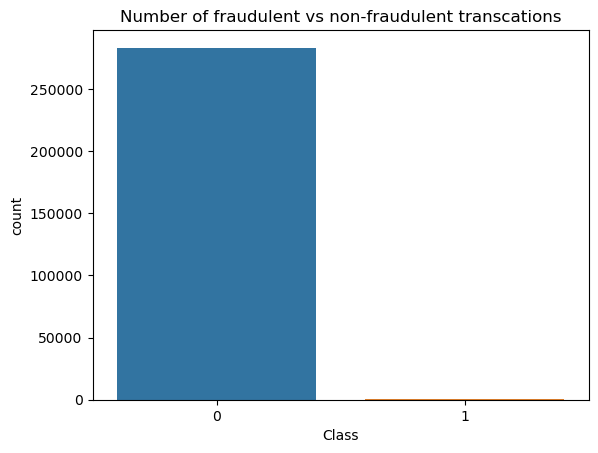

In [82]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()


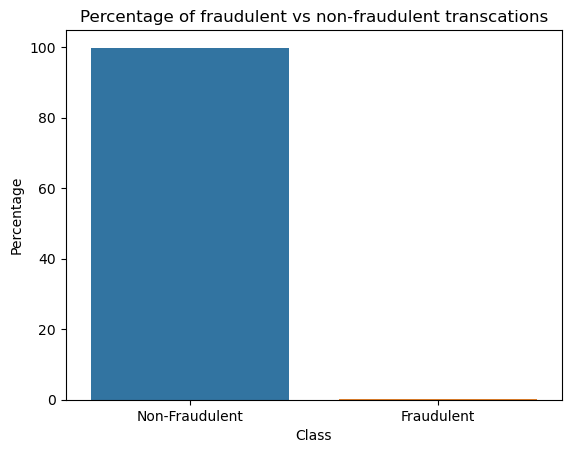

In [83]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

## Observe the distribution of classes with time

In [84]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

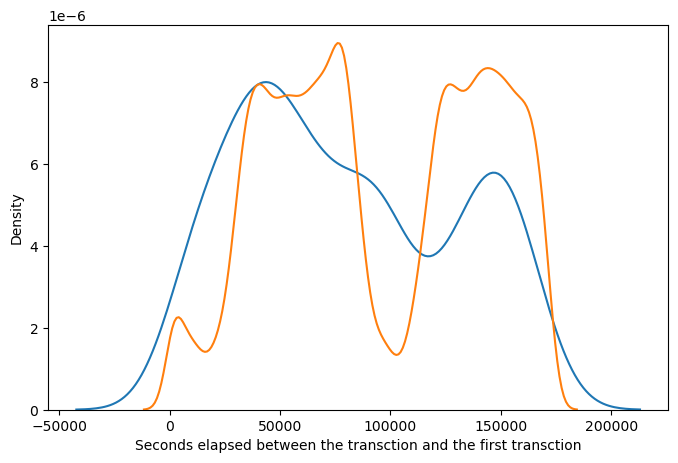

In [85]:
 #Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

## Analysis

#### We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

## Observe the distribution of classes with amount

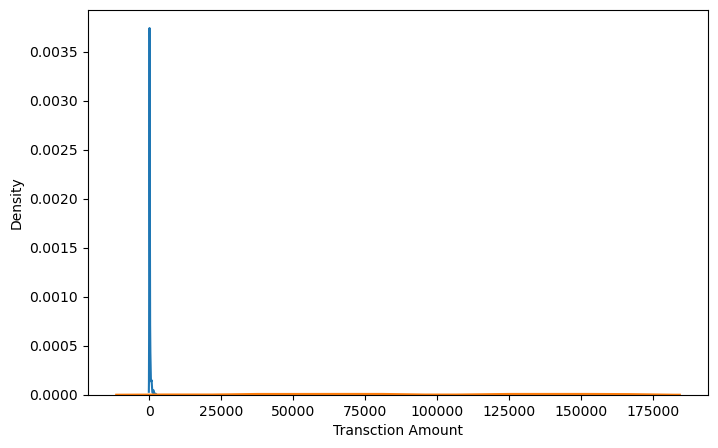

In [86]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()


### Analysis

#### We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

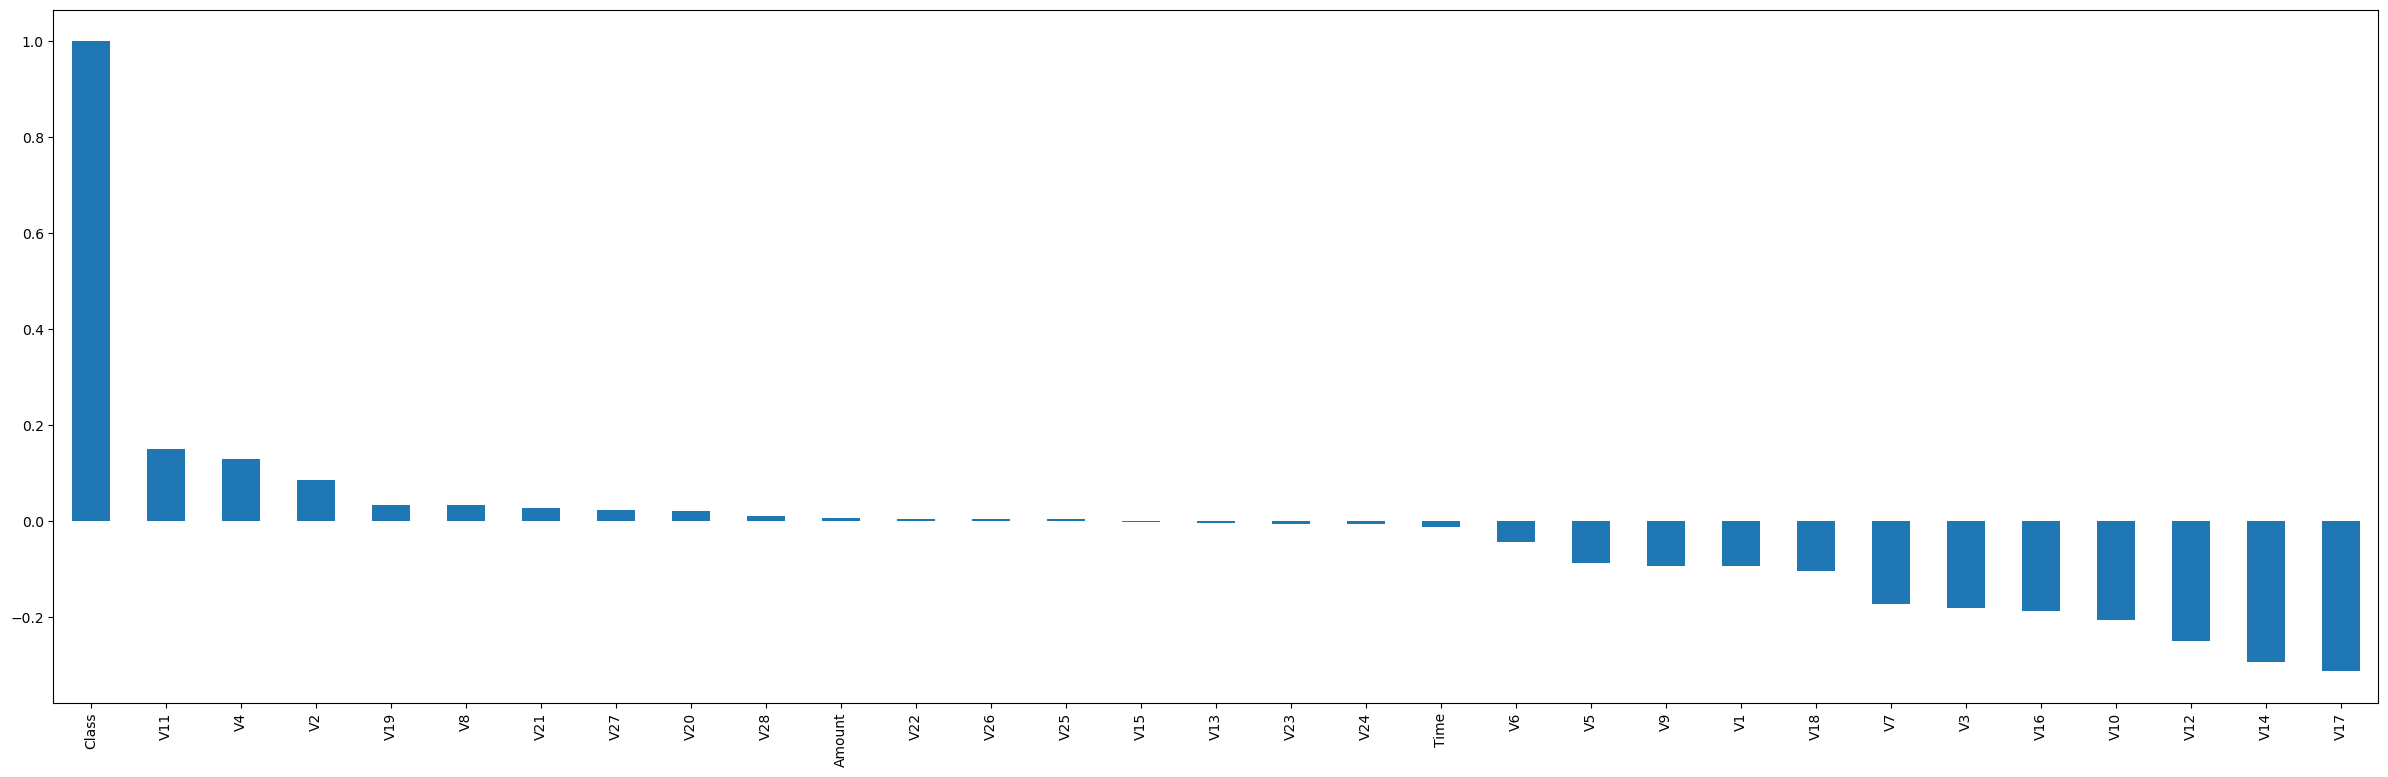

In [87]:
#Get Correlation of "Class" with other variables:
plt.figure(figsize=(30,9))
df.corr()['Class'].sort_values(ascending = False).plot(kind = 'bar')
plt.show()


## inferences:

- Class is highly positively correlated to V11, V4 and V2
- Class is highly negatively correlated to V17, V14 and V12
- Class has no correlation or zero correlation with V25, V22 and 4pm to 8pm

## Correlation between features

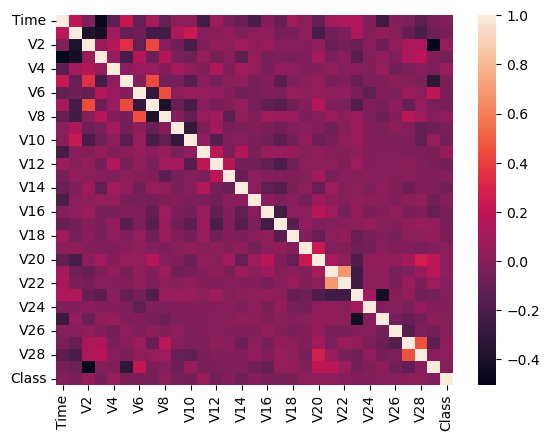

In [88]:
#Using Spearman Correlation Coefficient to see how much the features are co-related to each other
ax = sns.heatmap(df.corr(method='spearman'))
plt.show()

- It seems the features are quite not related to each other as no points are dark orange and very few are light orange which means few slightly related

## Plotting the distribution of a variable¶

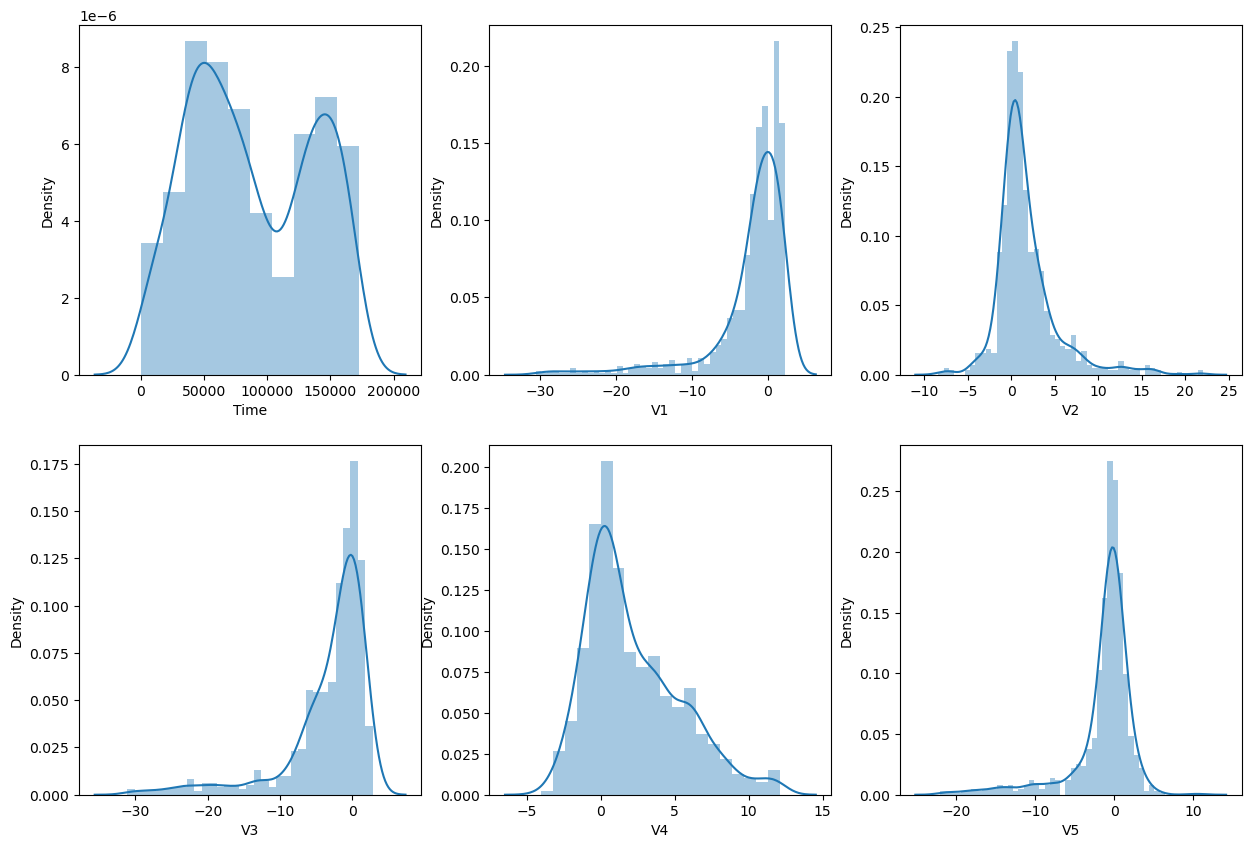

In [89]:
# plot the histogram of variable from the dataset to see the skewness
plt.figure(figsize = (15,10))
plt.subplot(231)
sns.distplot(X['Time'])
plt.subplot(232)
sns.distplot(X['V1'])
plt.subplot(233)
sns.distplot(X['V2'])
plt.subplot(234)
sns.distplot(X['V3'])
plt.subplot(235)
sns.distplot(X['V4'])
plt.subplot(236)
sns.distplot(X['V5'])
plt.show()

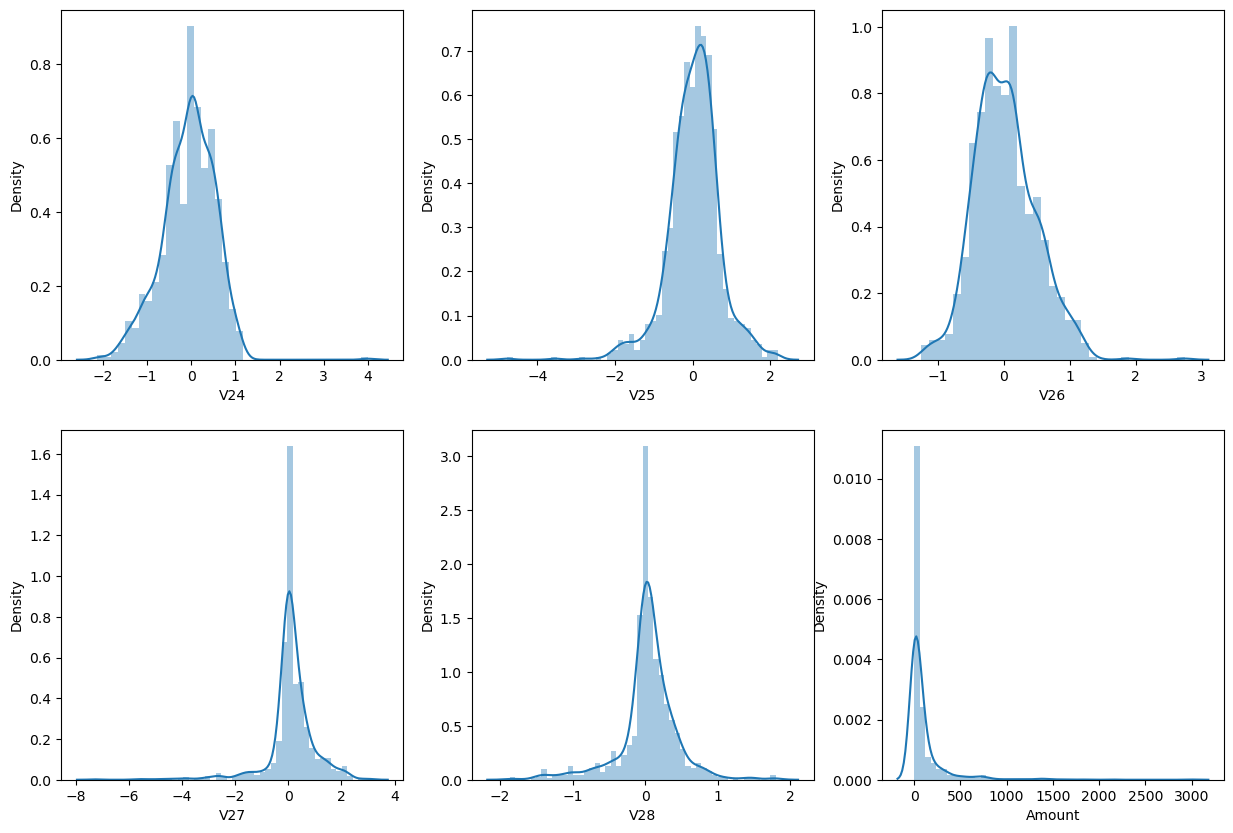

In [90]:
plt.figure(figsize = (15,10))
plt.subplot(231)
sns.distplot(X['V24'])
plt.subplot(232)
sns.distplot(X['V25'])
plt.subplot(233)
sns.distplot(X['V26'])
plt.subplot(234)
sns.distplot(X['V27'])
plt.subplot(235)
sns.distplot(X['V28'])
plt.subplot(236)
sns.distplot(X['Amount'])
plt.show()

- There is no skewness present in the distribution except for the 'Time' variable

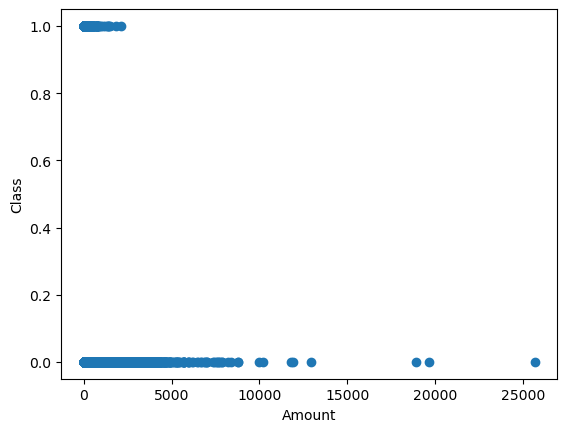

In [91]:
plt.scatter(df['Amount'],df['Class']) #From the scatter plot we can obeserve that only few points in normal transactions are above 10,000$
plt.xlabel("Amount")
plt.ylabel("Class")
plt.show()

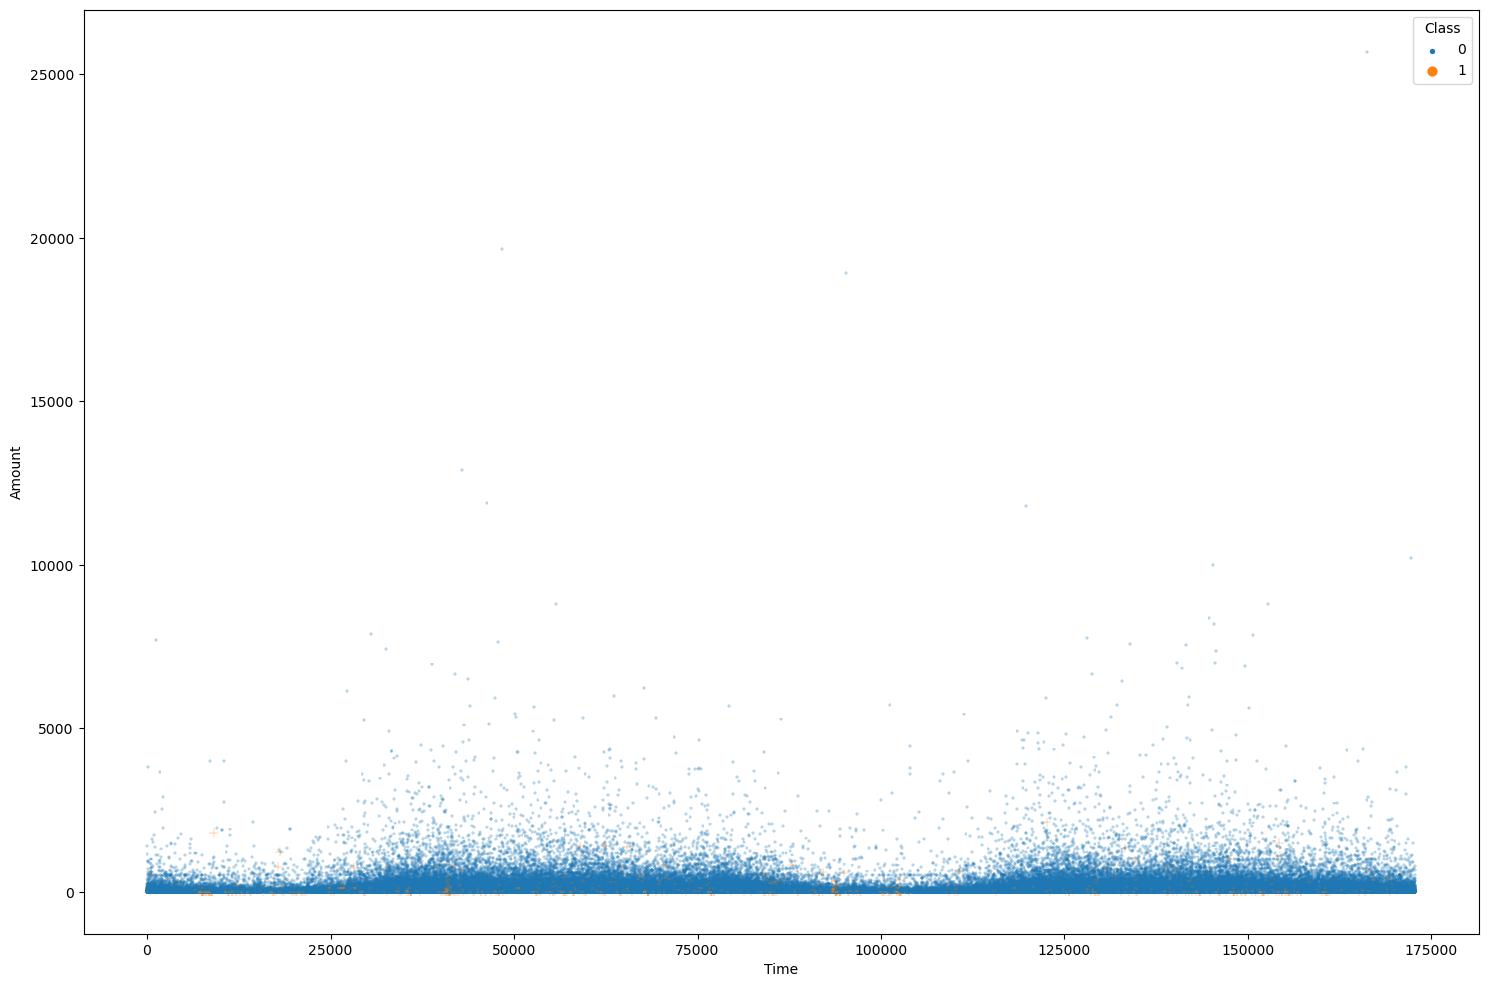

In [7]:
plt.figure(figsize=(18,12))
sns.scatterplot(x=df["Time"], y=df["Amount"], hue=df["Class"], size=df["Class"], sizes=(40, 8), marker="+")
plt.show()

### Depict the distribution of fraudulent transactions among others through the time with their amount. Ups and downs show a day and night trend, respectively. Although we already knew this, it could be also concluded from this scatter plot that the data belongs to a two-day period.

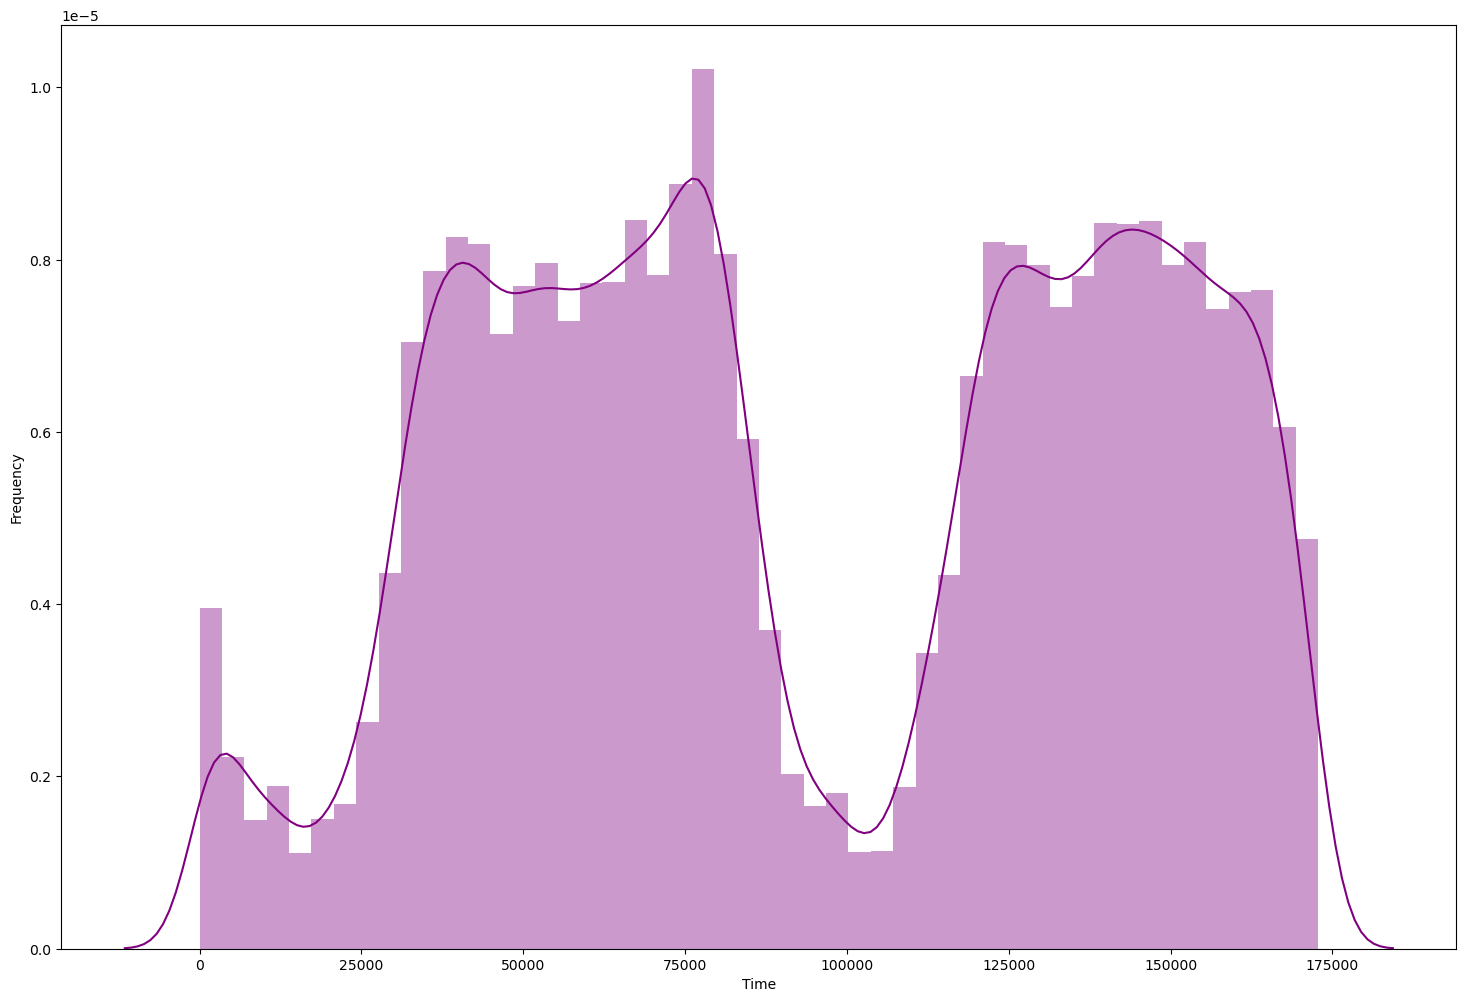

In [5]:
plt.figure(figsize=(18,12))
plot = sns.distplot(a=df["Time"], kde=True, color='purple')
plot.set(xlabel ='Time', ylabel ='Frequency')
plt.show()

### Depict how number of transactions varies in time. As in the Scatterplot it was shown, ups and downs show a day and night trend, respectively.

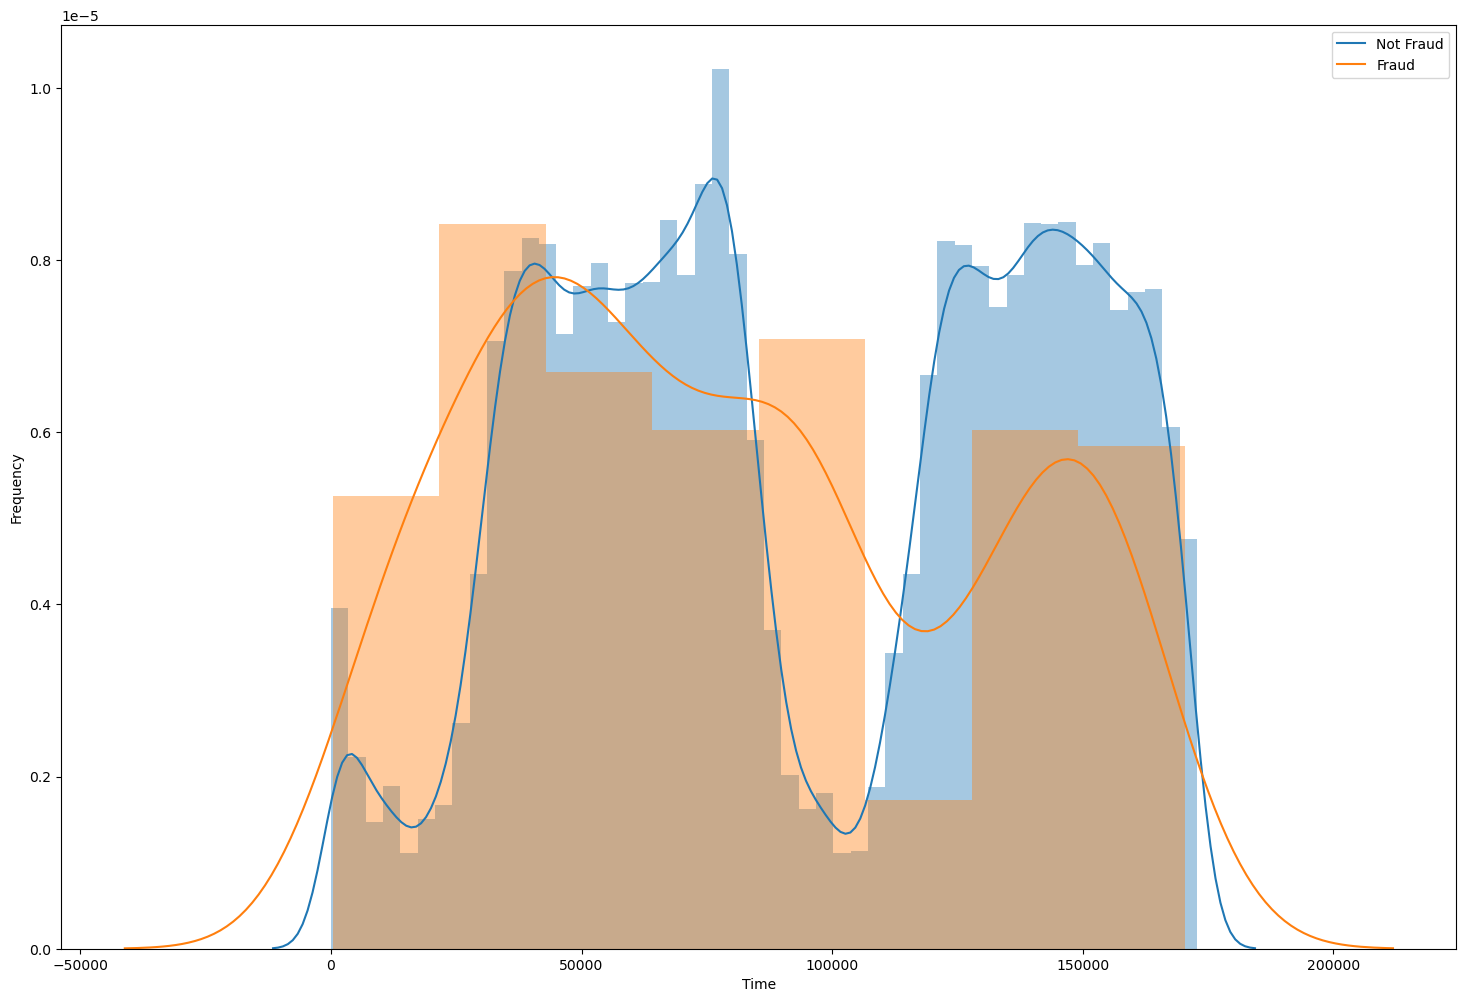

In [8]:
fraudulent_transactions = df[df['Class'] == 1]
nonfraudulent_transactions = df[df['Class'] == 0]

plt.figure(figsize=(18,12))

sns.distplot(a=nonfraudulent_transactions["Time"], kde=True)
plot = sns.distplot(a=fraudulent_transactions["Time"], kde=True)

plot.set(xlabel ='Time', ylabel ='Frequency')
plot.legend(['Not Fraud', 'Fraud'])
plt.show()

### Depict how the frequency of fraudulent transactions (orange) is distributed in time, compared to that of the non-fraudulents (blue).

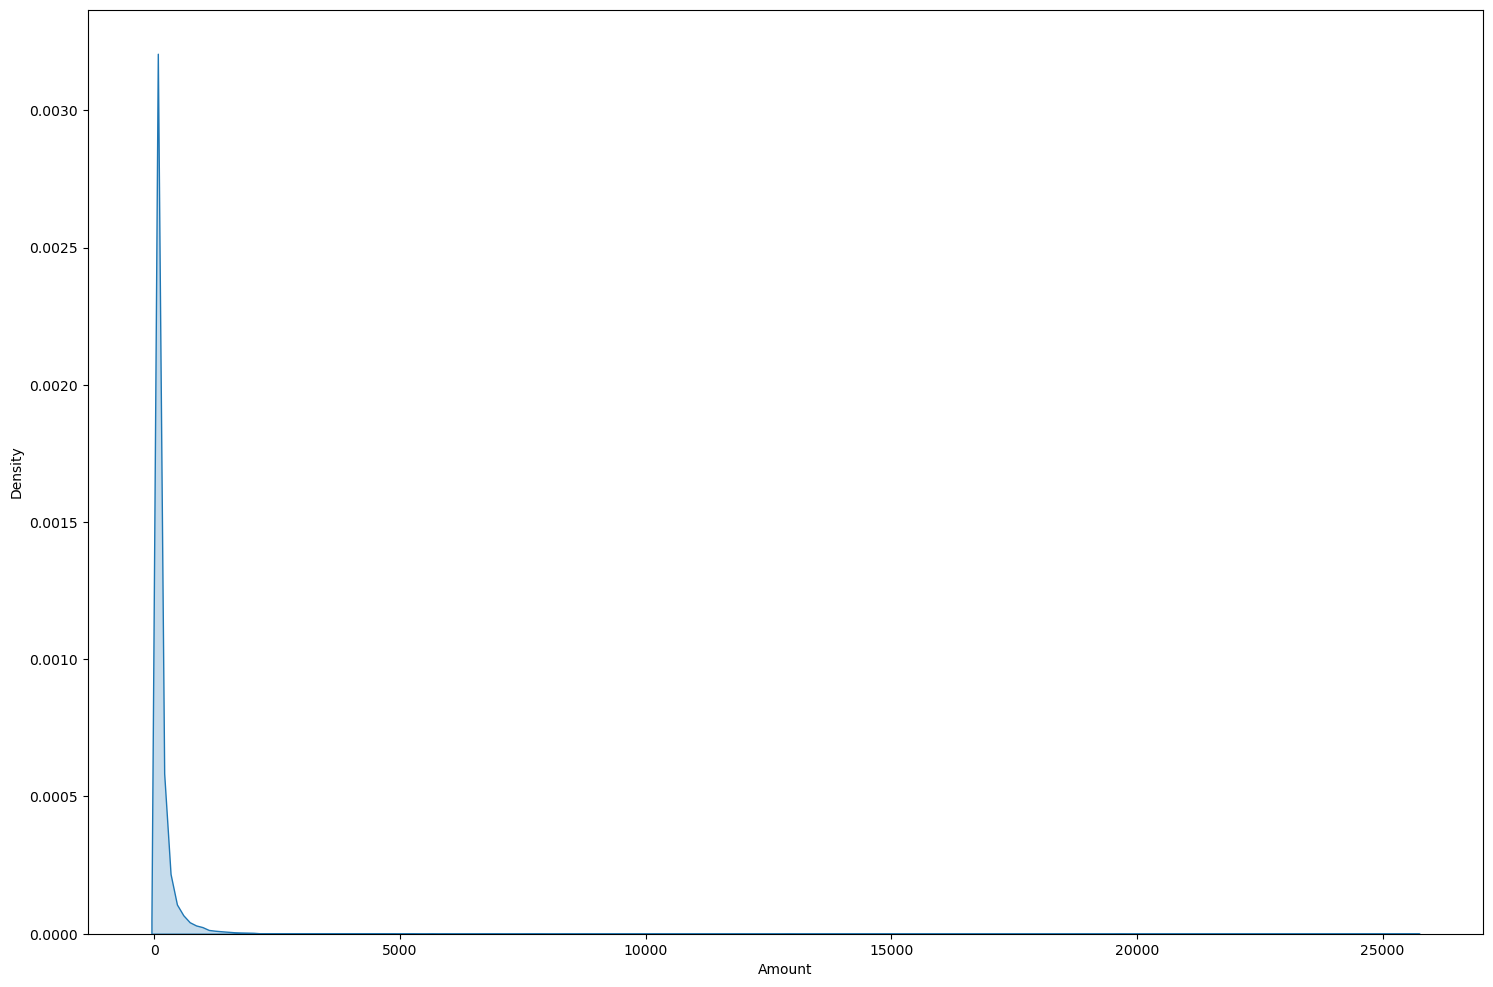

In [9]:
plt.figure(figsize=(18,12))

nonfraudulent_transactions = df[df['Class'] == 0]
plot = sns.kdeplot(data=nonfraudulent_transactions["Amount"], label="Not Fraud", shade=True)
plot.set(xlabel ='Amount', ylabel ='Density')
plt.show()

### Depict the density estimation of non-fraudulent transactions according to their amounts.

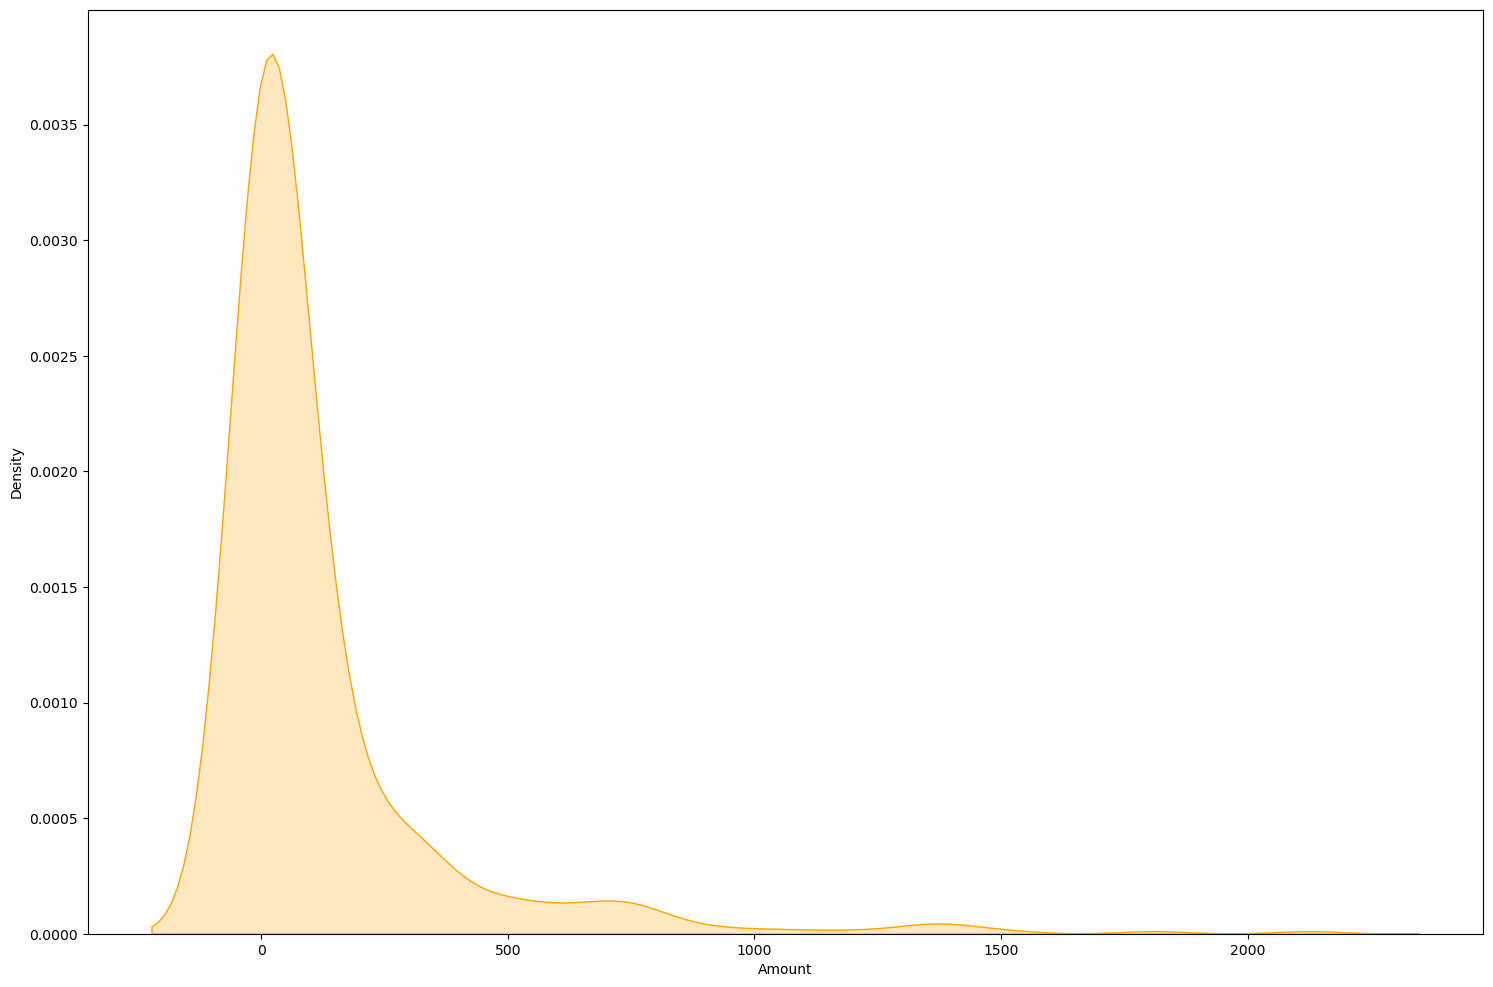

In [10]:
plt.figure(figsize=(18,12))

fraudulent_transactions = df[df['Class'] == 1]
plot = sns.kdeplot(data=fraudulent_transactions["Amount"], label="Fraud", shade=True, color='orange')
plot.set(xlabel ='Amount', ylabel ='Density')
plt.show()

### Depict the density estimation of fraudulent transactions according to their amounts.

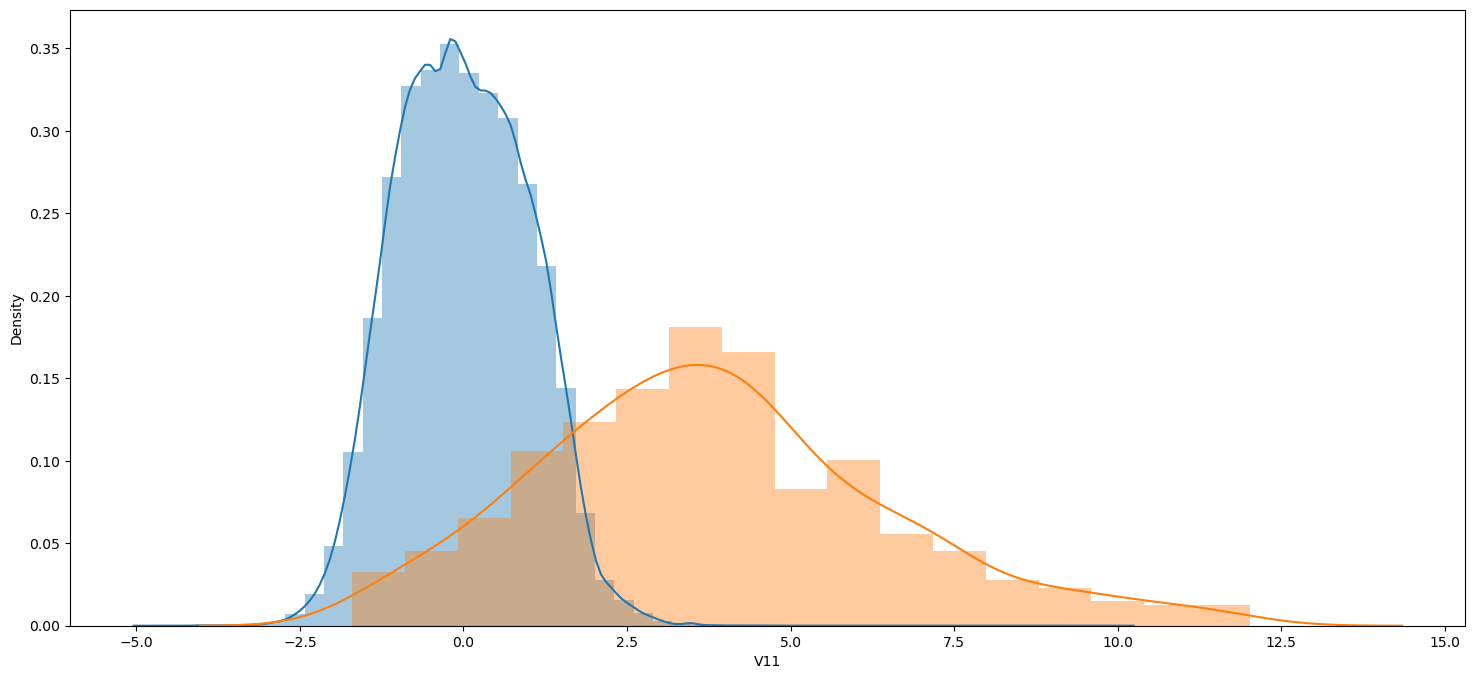

In [5]:
plt.figure(figsize=(18,8))

nonfraudulent_data = df[df["Class"] == 0]
sns.distplot(a=nonfraudulent_data["V11"], kde="True")

fraudulent_data = df[df["Class"] == 1]
sns.distplot(a=fraudulent_data["V11"], kde="True")
plt.show()

### Depict a comparison between the histograms of feature V4 of fraudulent transactions and that of the nonfraudulents.

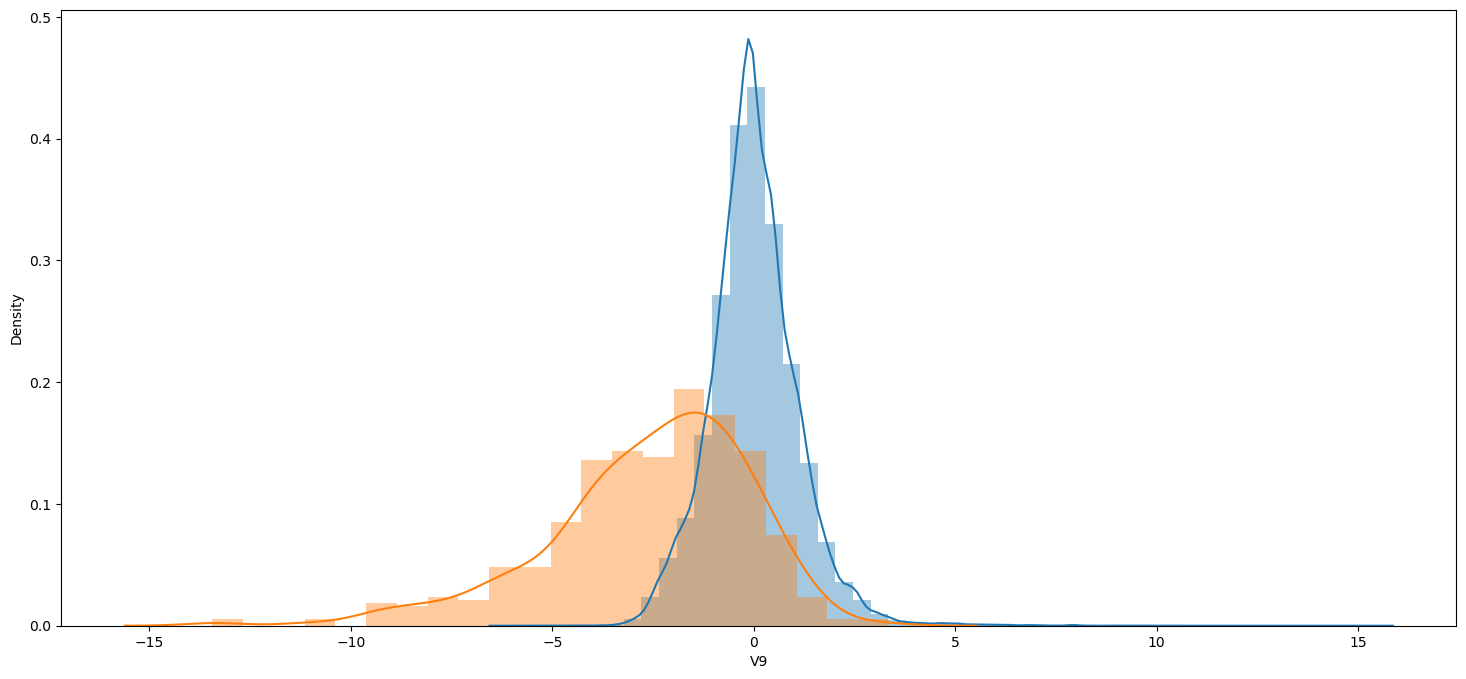

In [7]:
plt.figure(figsize=(18,8))

nonfraudulent_data = df[df["Class"] == 0]
sns.distplot(a=nonfraudulent_data["V9"], kde="True")

fraudulent_data = df[df["Class"] == 1]
sns.distplot(a=fraudulent_data["V9"], kde="True")
plt.show()

### Depict a comparison between the histograms of feature V9 of fraudulent transactions and that of the nonfraudulents.

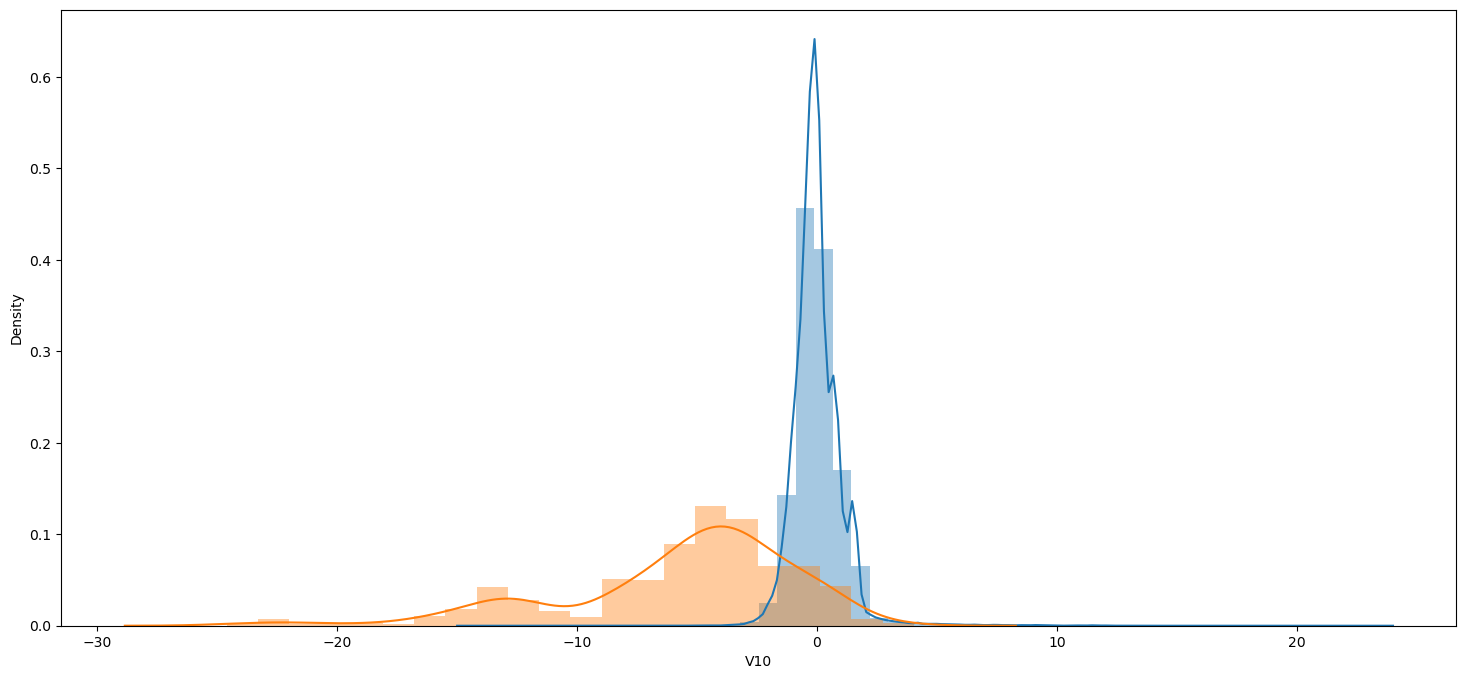

In [9]:
plt.figure(figsize=(18,8))

nonfraudulent_data = df[df["Class"] == 0]
sns.distplot(a=nonfraudulent_data["V10"], kde="True")

fraudulent_data = df[df["Class"] == 1]
sns.distplot(a=fraudulent_data["V10"], kde="True")
plt.show()

### Depict a comparison between the histograms of feature V10 of fraudulent transactions and that of the nonfraudulents.

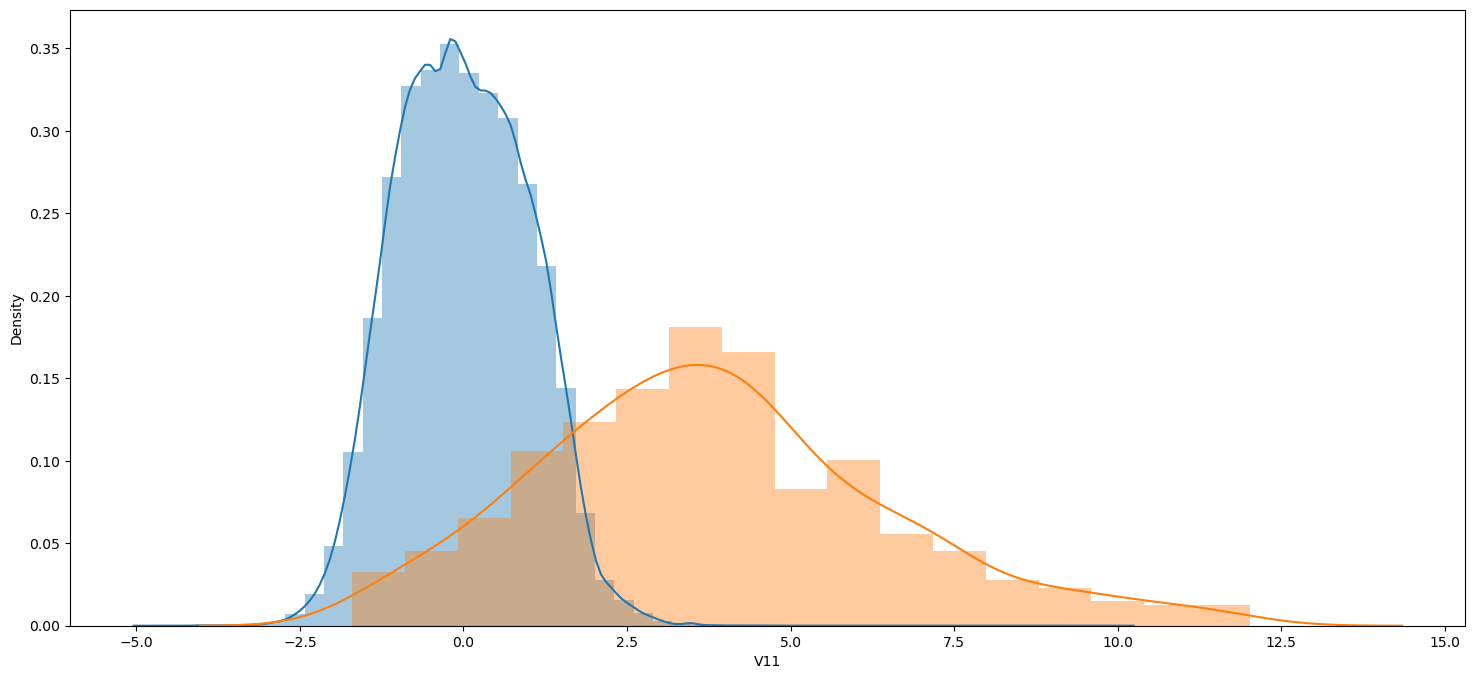

In [10]:
plt.figure(figsize=(18,8))

nonfraudulent_data = df[df["Class"] == 0]
sns.distplot(a=nonfraudulent_data["V11"], kde="True")

fraudulent_data = df[df["Class"] == 1]
sns.distplot(a=fraudulent_data["V11"], kde="True")
plt.show()

### Depict a comparison between the histograms of feature V11 of fraudulent transactions and that of the nonfraudulents.

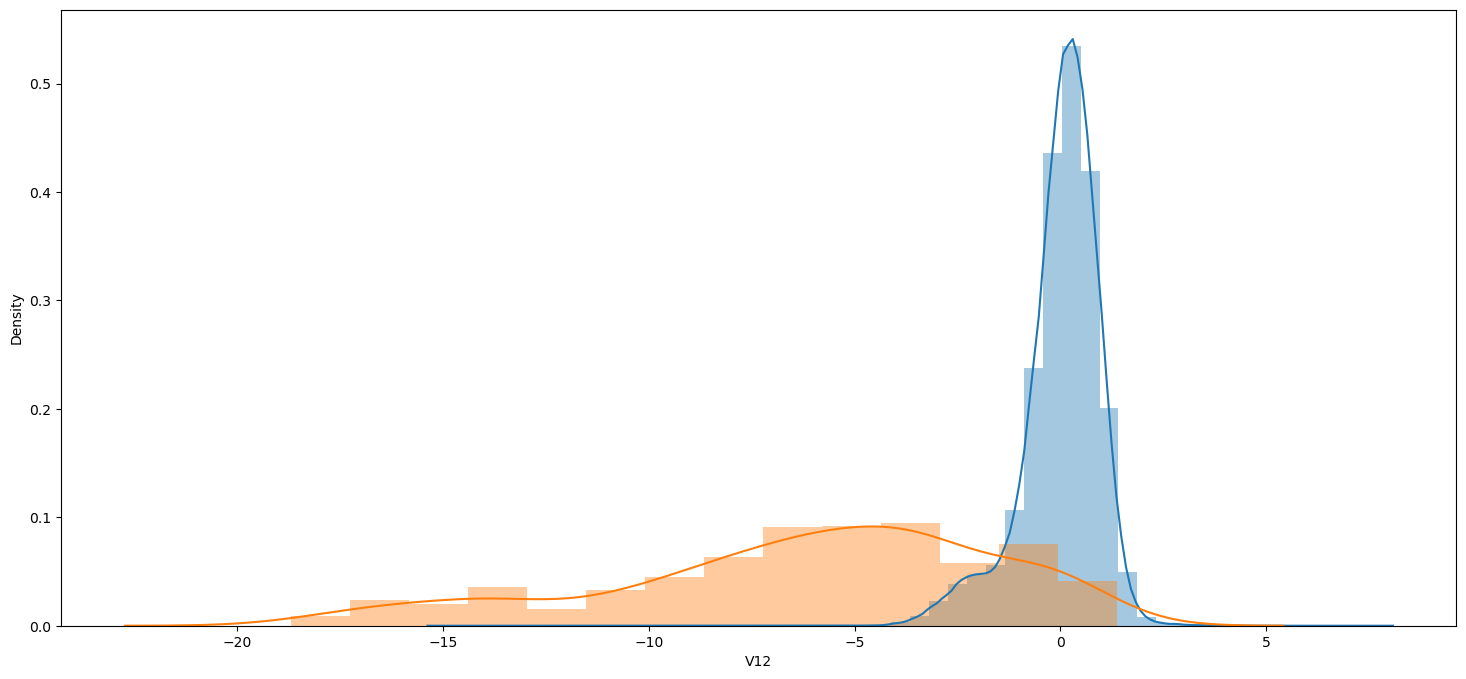

In [11]:
plt.figure(figsize=(18,8))

nonfraudulent_data = df[df["Class"] == 0]
sns.distplot(a=nonfraudulent_data["V12"], kde="True")

fraudulent_data = df[df["Class"] == 1]
sns.distplot(a=fraudulent_data["V12"], kde="True")
plt.show()

### Depict a comparison between the histograms of feature V12 of fraudulent transactions and that of the nonfraudulents.

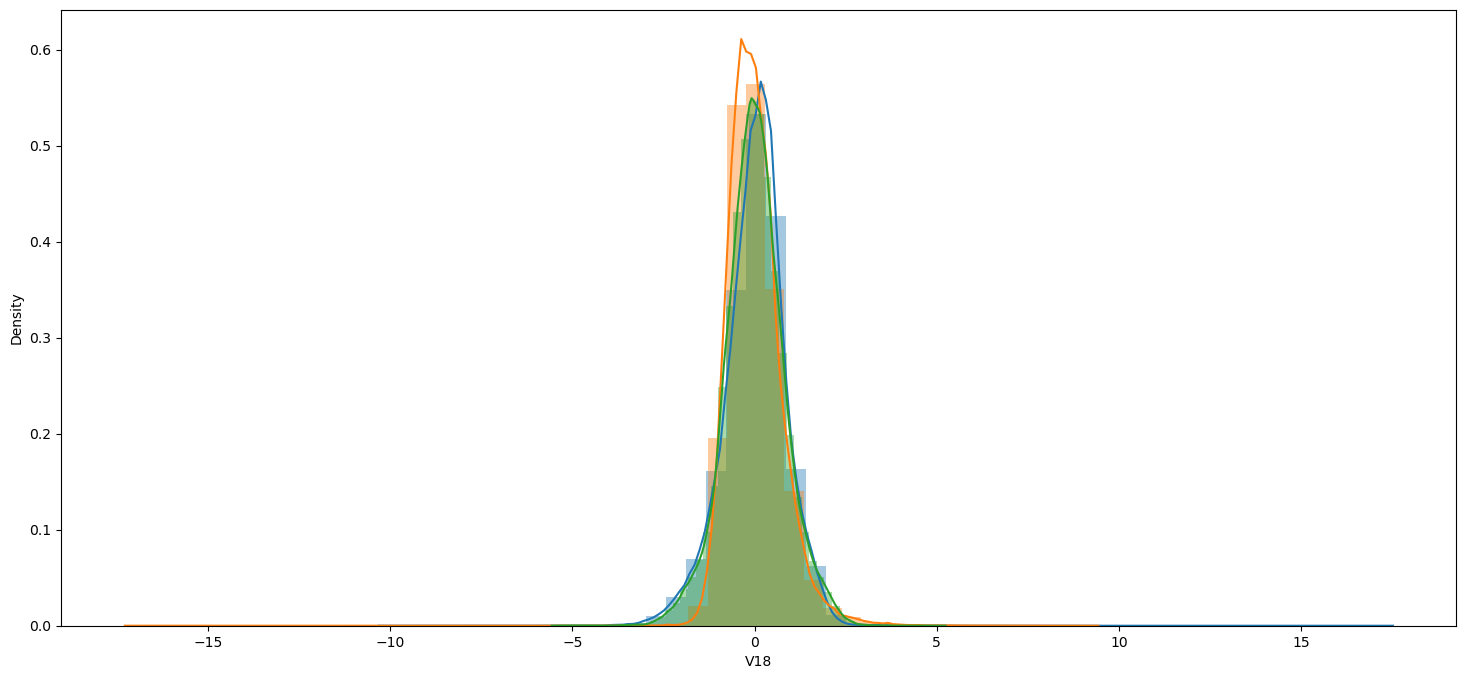

In [12]:
plt.figure(figsize=(18,8))

nonfraudulent_data = df[df["Class"] == 0]
sns.distplot(a=nonfraudulent_data["V16"], kde="True")
sns.distplot(a=nonfraudulent_data["V17"], kde="True")
sns.distplot(a=nonfraudulent_data["V18"], kde="True")
plt.show()

### Depict the similar distribution nonfraudulent transactions based on features V16, V17, and V18.

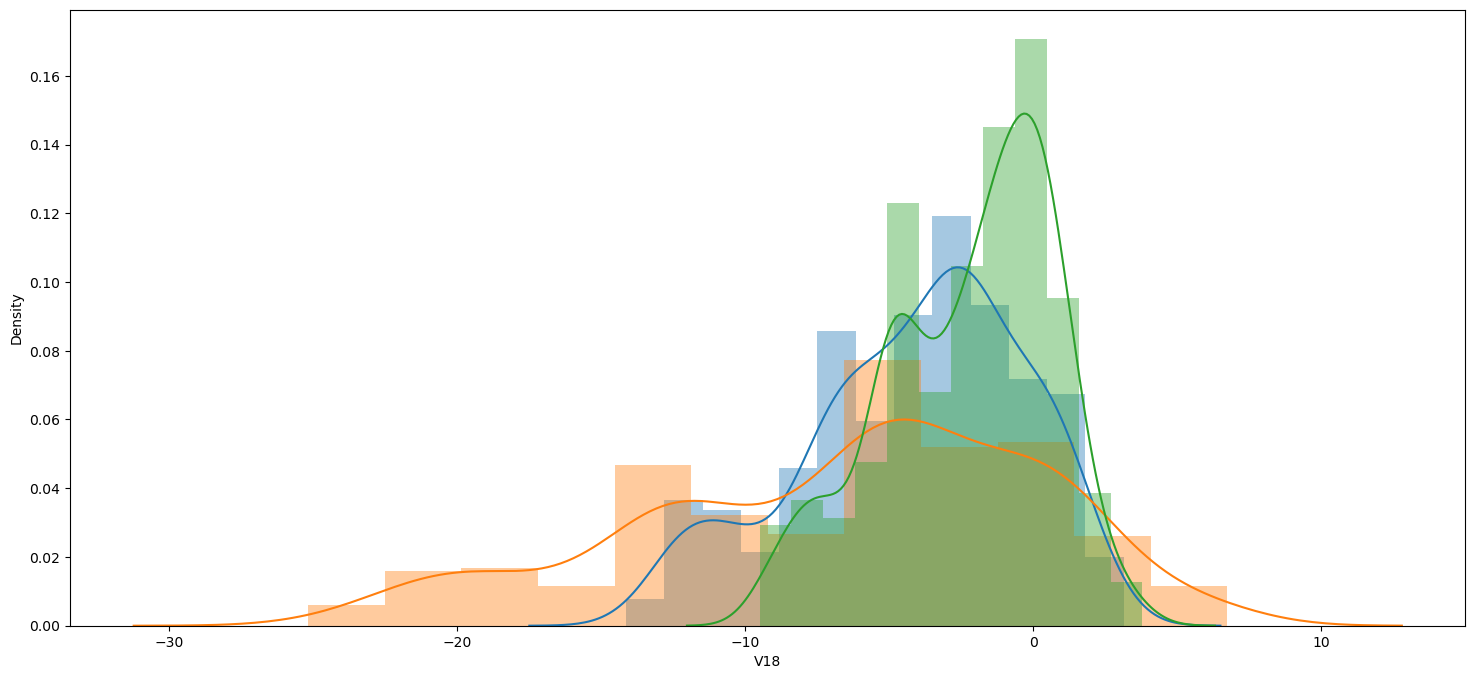

In [13]:
plt.figure(figsize=(18,8))

fraudulent_data = df[df["Class"] == 1]
sns.distplot(a=fraudulent_data["V16"], kde="True")
sns.distplot(a=fraudulent_data["V17"], kde="True")
sns.distplot(a=fraudulent_data["V18"], kde="True")
plt.show()

### Depict the almost similar distribution fraudulent transactions based on features V16, V17, and V18.

#### This Dataset is highly unblanced
#### 0 -->Normal Transaction
#### 1-->Fraudulent transaction

In [6]:
# separating the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [7]:
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [8]:
print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


In [9]:
# statistical measures of the data
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [84]:
# compare the values for both transactions
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#### Under-Sampling

##### Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

##### Number of Fraudulent Transactions --> 492

In [18]:
legit_sample = legit.sample(n=492)

#### Concatenating two DataFrames

In [19]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [20]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
198996,132758.0,2.091870,0.087483,-2.047316,0.096496,0.905391,-0.054291,0.070790,-0.038466,0.281544,...,-0.368822,-0.986721,0.217616,-0.390042,-0.169234,0.207966,-0.067295,-0.049146,2.69,0
47273,43155.0,-3.974601,-4.465240,-3.993802,2.913663,-2.750074,3.419696,0.005277,-6.667503,-0.231813,...,-2.611631,-1.327644,-13.513892,-0.858127,-2.829282,-0.391484,2.099804,0.084728,3000.00,0
140965,84054.0,-0.569061,0.948254,1.840179,-0.474471,0.083725,-0.845683,0.845708,-0.046373,-0.546892,...,-0.086832,-0.288165,0.066935,0.594056,-0.508454,-0.124755,0.083925,0.132238,2.69,0
37810,39121.0,0.949569,-0.631806,1.802280,1.723303,-1.391637,1.112952,-1.267925,0.683414,1.685888,...,-0.005262,0.350303,-0.041553,0.213128,0.352579,-0.238293,0.103891,0.026435,30.00,0
234135,147842.0,-0.534378,0.987921,-0.552964,-0.300814,0.329660,-1.372363,0.628324,0.116430,-0.025592,...,0.403003,1.301443,0.130905,-0.002534,-0.733695,-0.218267,0.276790,0.231802,2.69,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [21]:
new_dataset['Class'].value_counts()

0    492
1    473
Name: Class, dtype: int64

In [22]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94902.991870,-0.06667,0.057837,-0.098777,-0.020128,0.054299,0.099856,-0.039838,0.070036,-0.033746,...,-0.012324,0.026785,-0.043620,-0.030307,-0.012200,0.030484,0.005280,0.014208,0.005284,83.573171
1,80450.513742,-4.49828,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.466550,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


### Splitting the data into Features & Targets

In [23]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [24]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
198996,132758.0,2.091870,0.087483,-2.047316,0.096496,0.905391,-0.054291,0.070790,-0.038466,0.281544,...,-0.109402,-0.368822,-0.986721,0.217616,-0.390042,-0.169234,0.207966,-0.067295,-0.049146,2.69
47273,43155.0,-3.974601,-4.465240,-3.993802,2.913663,-2.750074,3.419696,0.005277,-6.667503,-0.231813,...,1.059269,-2.611631,-1.327644,-13.513892,-0.858127,-2.829282,-0.391484,2.099804,0.084728,3000.00
140965,84054.0,-0.569061,0.948254,1.840179,-0.474471,0.083725,-0.845683,0.845708,-0.046373,-0.546892,...,-0.177713,-0.086832,-0.288165,0.066935,0.594056,-0.508454,-0.124755,0.083925,0.132238,2.69
37810,39121.0,0.949569,-0.631806,1.802280,1.723303,-1.391637,1.112952,-1.267925,0.683414,1.685888,...,-0.274787,-0.005262,0.350303,-0.041553,0.213128,0.352579,-0.238293,0.103891,0.026435,30.00
234135,147842.0,-0.534378,0.987921,-0.552964,-0.300814,0.329660,-1.372363,0.628324,0.116430,-0.025592,...,-0.211071,0.403003,1.301443,0.130905,-0.002534,-0.733695,-0.218267,0.276790,0.231802,2.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [25]:
Y

198996    0
47273     0
140965    0
37810     0
234135    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 965, dtype: int64

## Split the data into Training data & Testing Data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(965, 30) (772, 30) (193, 30)


### Model 1:Logistic Regression

In [96]:
model = LogisticRegression()

In [97]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

In [107]:
# accuracy on training data
Y_predict = model.predict(X_test)
Y_predict

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [108]:
model.score(X_train,Y_train)

0.9555273189326556

In [131]:
model.score(X_test,Y_test)

0.9238578680203046

In [111]:
df_new = pd.DataFrame({'Actual':Y_test,'Predicted':Y_predict})

In [112]:
df_new

,Actual,Predicted
247995,1,1
159873,0,0
196109,0,0
279503,0,0
15451,1,1
...,...,...
108258,1,0
12108,1,1
99506,1,1
74496,1,1


In [113]:
from sklearn.metrics import accuracy_score

In [114]:
accuracy =accuracy_score(Y_test,Y_predict)
accuracy

0.9238578680203046

In [115]:
from sklearn.metrics import confusion_matrix

In [116]:
performance = confusion_matrix(Y_test,Y_predict)
performance

array([[94,  5],
       [10, 88]], dtype=int64)

In [123]:
from sklearn.metrics import classification_report

In [124]:
report =classification_report(Y_test,Y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        99
           1       0.95      0.90      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



## Accuracy : 92%

## Model 2: Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
model2 =DecisionTreeClassifier()

In [127]:
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [128]:
Y_predict = model2.predict(X_test)

In [130]:
model2.score(X_train,Y_train)

1.0

In [132]:
model2.score(X_test,Y_test)

0.8883248730964467

In [133]:
from sklearn.metrics import accuracy_score 88%KNN S

In [134]:
accuracy =accuracy_score(Y_test,Y_predict)
accuracy

0.8883248730964467

## Accuracy :88 %

## Model3:KNN(K-Nearest Neighbor)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
model3=KNeighborsClassifier()

In [29]:
model3.fit(X_train,Y_train)

KNeighborsClassifier()

In [32]:
Y_predict = model3.predict(X_test)


In [33]:
model3.score(X_train,Y_train)

0.7370466321243523

In [34]:
model3.score(X_test,Y_test)

0.7202072538860104

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy =accuracy_score(Y_test,Y_predict)
accuracy

0.7202072538860104

In [37]:
from sklearn.metrics import classification_report

In [38]:
report1 =classification_report(Y_test,Y_predict)
print(report1)

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        98
           1       0.73      0.68      0.71        95

    accuracy                           0.72       193
   macro avg       0.72      0.72      0.72       193
weighted avg       0.72      0.72      0.72       193



## Accuracy : 72 %

## Model 4: SVM(Support Vector Machine)

In [41]:
from sklearn.svm import SVC

In [42]:
model4=SVC()

In [43]:
model4.fit(X_train,Y_train)

SVC()

In [44]:
Y_predict = model4.predict(X_test)

In [45]:
model4.score(X_train,Y_train)

0.5841968911917098

In [46]:
model4.score(X_test,Y_test)

0.5647668393782384

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy =accuracy_score(Y_test,Y_predict)
accuracy

0.5647668393782384

In [49]:
from sklearn.metrics import classification_report

In [50]:
report2 =classification_report(Y_test,Y_predict)
print(report2)

              precision    recall  f1-score   support

           0       0.55      0.82      0.66        98
           1       0.62      0.31      0.41        95

    accuracy                           0.56       193
   macro avg       0.58      0.56      0.53       193
weighted avg       0.58      0.56      0.53       193



## Accuracy : 56 %

## Model 5: Naive Bayes Classifier

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
model5=GaussianNB()

In [53]:
model5.fit(X_train,Y_train)

GaussianNB()

In [54]:
Y_predict = model5.predict(X_test)

In [55]:
model5.score(X_train,Y_train)

0.8756476683937824

In [56]:
model5.score(X_test,Y_test)

0.8808290155440415

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy =accuracy_score(Y_test,Y_predict)
accuracy

0.8808290155440415

In [59]:
from sklearn.metrics import classification_report

In [60]:
report3 =classification_report(Y_test,Y_predict)
print(report3)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89        98
           1       0.97      0.78      0.87        95

    accuracy                           0.88       193
   macro avg       0.90      0.88      0.88       193
weighted avg       0.90      0.88      0.88       193



## Accuracy : 88 %

## Model 6: Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
model6=RandomForestClassifier()

In [63]:
model6.fit(X_train,Y_train)

RandomForestClassifier()

In [64]:
Y_predict = model6.predict(X_test)

In [65]:
model6.score(X_train,Y_train)

1.0

In [66]:
model6.score(X_test,Y_test)

0.9378238341968912

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy =accuracy_score(Y_test,Y_predict)
accuracy

0.9378238341968912

In [69]:
from sklearn.metrics import classification_report

In [70]:
report4 =classification_report(Y_test,Y_predict)
print(report4)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        98
           1       0.99      0.88      0.93        95

    accuracy                           0.94       193
   macro avg       0.94      0.94      0.94       193
weighted avg       0.94      0.94      0.94       193



## Accuracy : 93 %

### From comparing the 6 models, we can conclude that Model 6: Random Forest yields the
### highest accuracy. With an accuracy of 93%.
### We have precision, recall, f1-score and support:
### Precision : be "how many are correctly classified among that class"
### Recall : "how many of this class you find over the whole number of element of this class"
### F1-score : harmonic mean of precision and recall values. F1 score reaches its best value at
### 1 and worst value at 0. F1 Score = 2 x ((precision x recall) / (precision + recall))
### Support: of samples of the true response that lie in that class.

# Conclusions :

#### Credit Card is a great tool to pay money easily, but as with all the other monetary payment tools, reliability is a issue here too as it is subjected to breach and other frauds. To encounter this problem, a solution is needed to identify the patterns in the transactions and identify the ones which are fraud, so that finding such transactions beforehand in future will be very easy.

#### Machine Learning is a great tool to do this work since Machine Learning helps us in finding patterns in the data. Machine Learning can help producing great results if provided enough amount of data. Also, with further advances in the technology, Machine Learning too will advance with time, it will be easy for a person to predict if a transaction is fraud or not much more accurately with the advances.